# Solver examples rundown

This notebook is intended to demonstrate how to use the BanditSolvers library and to hopefully convince you of its efficacy when solving k-armed bandit problems.

## Basic simulations
This first part is intended as a summary analysis of the basic examples simulations.
The functions it runs are meant to be the basic examples that should be studied to understand how to use the library

### Methodology
The methodology for this simulation is as follow:
* for each solver a simulation is run
* each solver simulation is independent of the others
* the target are generated from 2 gamma distributions that are sampled each time its associated action is called
* For each simulation the parameters for the gamma distributions are the same
* The parameters of each solver are the same except for the unique parameters associated with each type

The solvers parameters are as follow:
```[python3]
    # General params
    optimistic_value=5.
    step_size=1e-2

    # epsilon
    epsilon=1e-2

    # ucb
    confidence=1e-2
```

#### Actions analysis
The gamma distributions parameters are as follow:
```
    # action_a
    alpha=0.5
    loc=0
    scale=1

    # action_b
    alpha=0.1
    loc=0
    scale=1
```
Which yields the following density functions

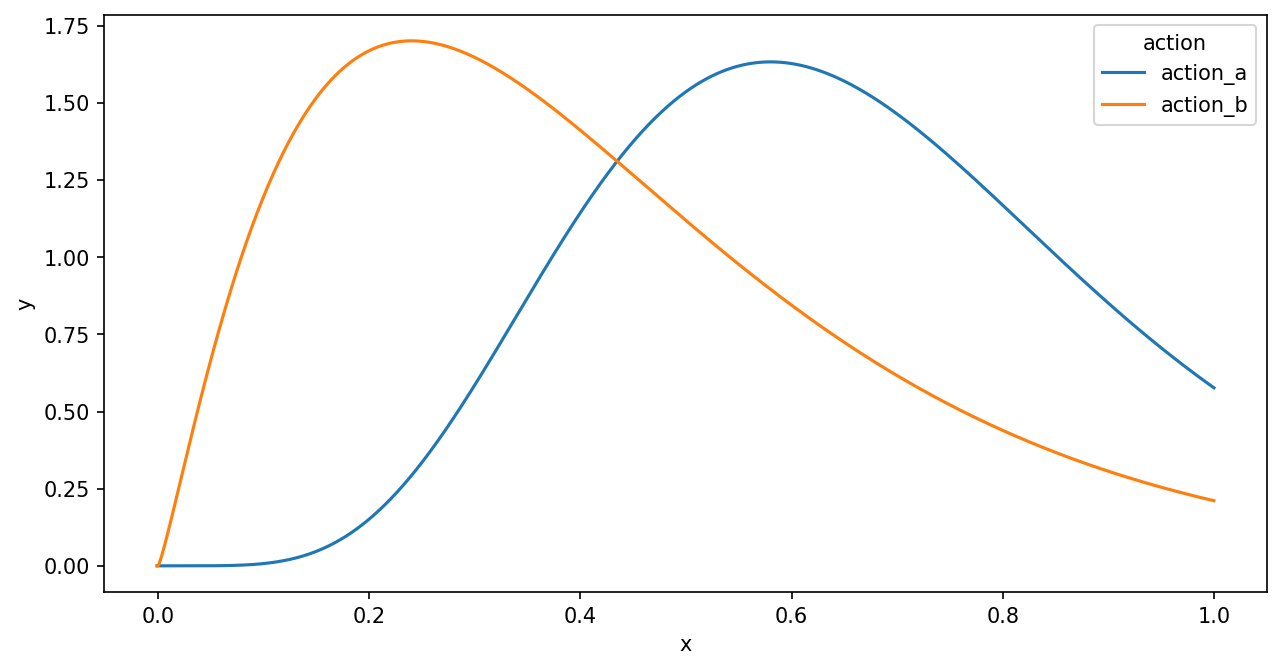

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame, concat
from scipy.stats import gamma

x = np.linspace(-0.001, 1, 1000)

action_a_y = gamma.pdf(x, a=6.8, scale=0.1, loc=0)
action_b_y = gamma.pdf(x, a=2.2, scale=0.2, loc=0)

action_a_pdf_df = DataFrame({
    'x': x,
    'y': action_a_y,
    'action': 'action_a'
})

action_b_pdf_df = DataFrame({
    'x': x,
    'y': action_b_y,
    'action': 'action_b'
})

actions_pdf_df = concat([action_a_pdf_df, action_b_pdf_df])

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] =150
plt.figure(figsize=(10, 5))

f = sns.lineplot(actions_pdf_df, x='x', y='y', hue='action')

Thanks to this graphic we see that of our two actions the clear winner is action_a, But there is still a decent overlap in the values that can be returned between the actions, which could lead to some confusion if we were to try and solve the problem manually

### Basic Simulation execution

In [2]:
from pandas import DataFrame
from Exemples.basic_exemples import run_basic_examples

base_examples_df: DataFrame = run_basic_examples()
base_examples_df

,steps,action_indexes,action_keys,targets,simulation
0,0,0,action_a,1.007351,weighted
1,1,0,action_a,0.512946,weighted
2,2,1,action_b,0.654484,weighted
3,3,1,action_b,0.144866,weighted
4,4,1,action_b,0.276184,weighted
...,...,...,...,...,...
95,95,0,action_a,0.477039,sampling
96,96,0,action_a,0.711026,sampling
97,97,0,action_a,0.545529,sampling
98,98,0,action_a,0.566072,sampling


As can be seen the result of this execution is a dataframe in which each row represents a decision.

Each row contains: 
* the step at which the decision was take
* the decision taken
* its associated target
* the solver that was used to take the decision

To illustrate that it might be hard to interpret the data based only on the resulting targets of the actions here is a plot of the targets obtained after each solver's decisions

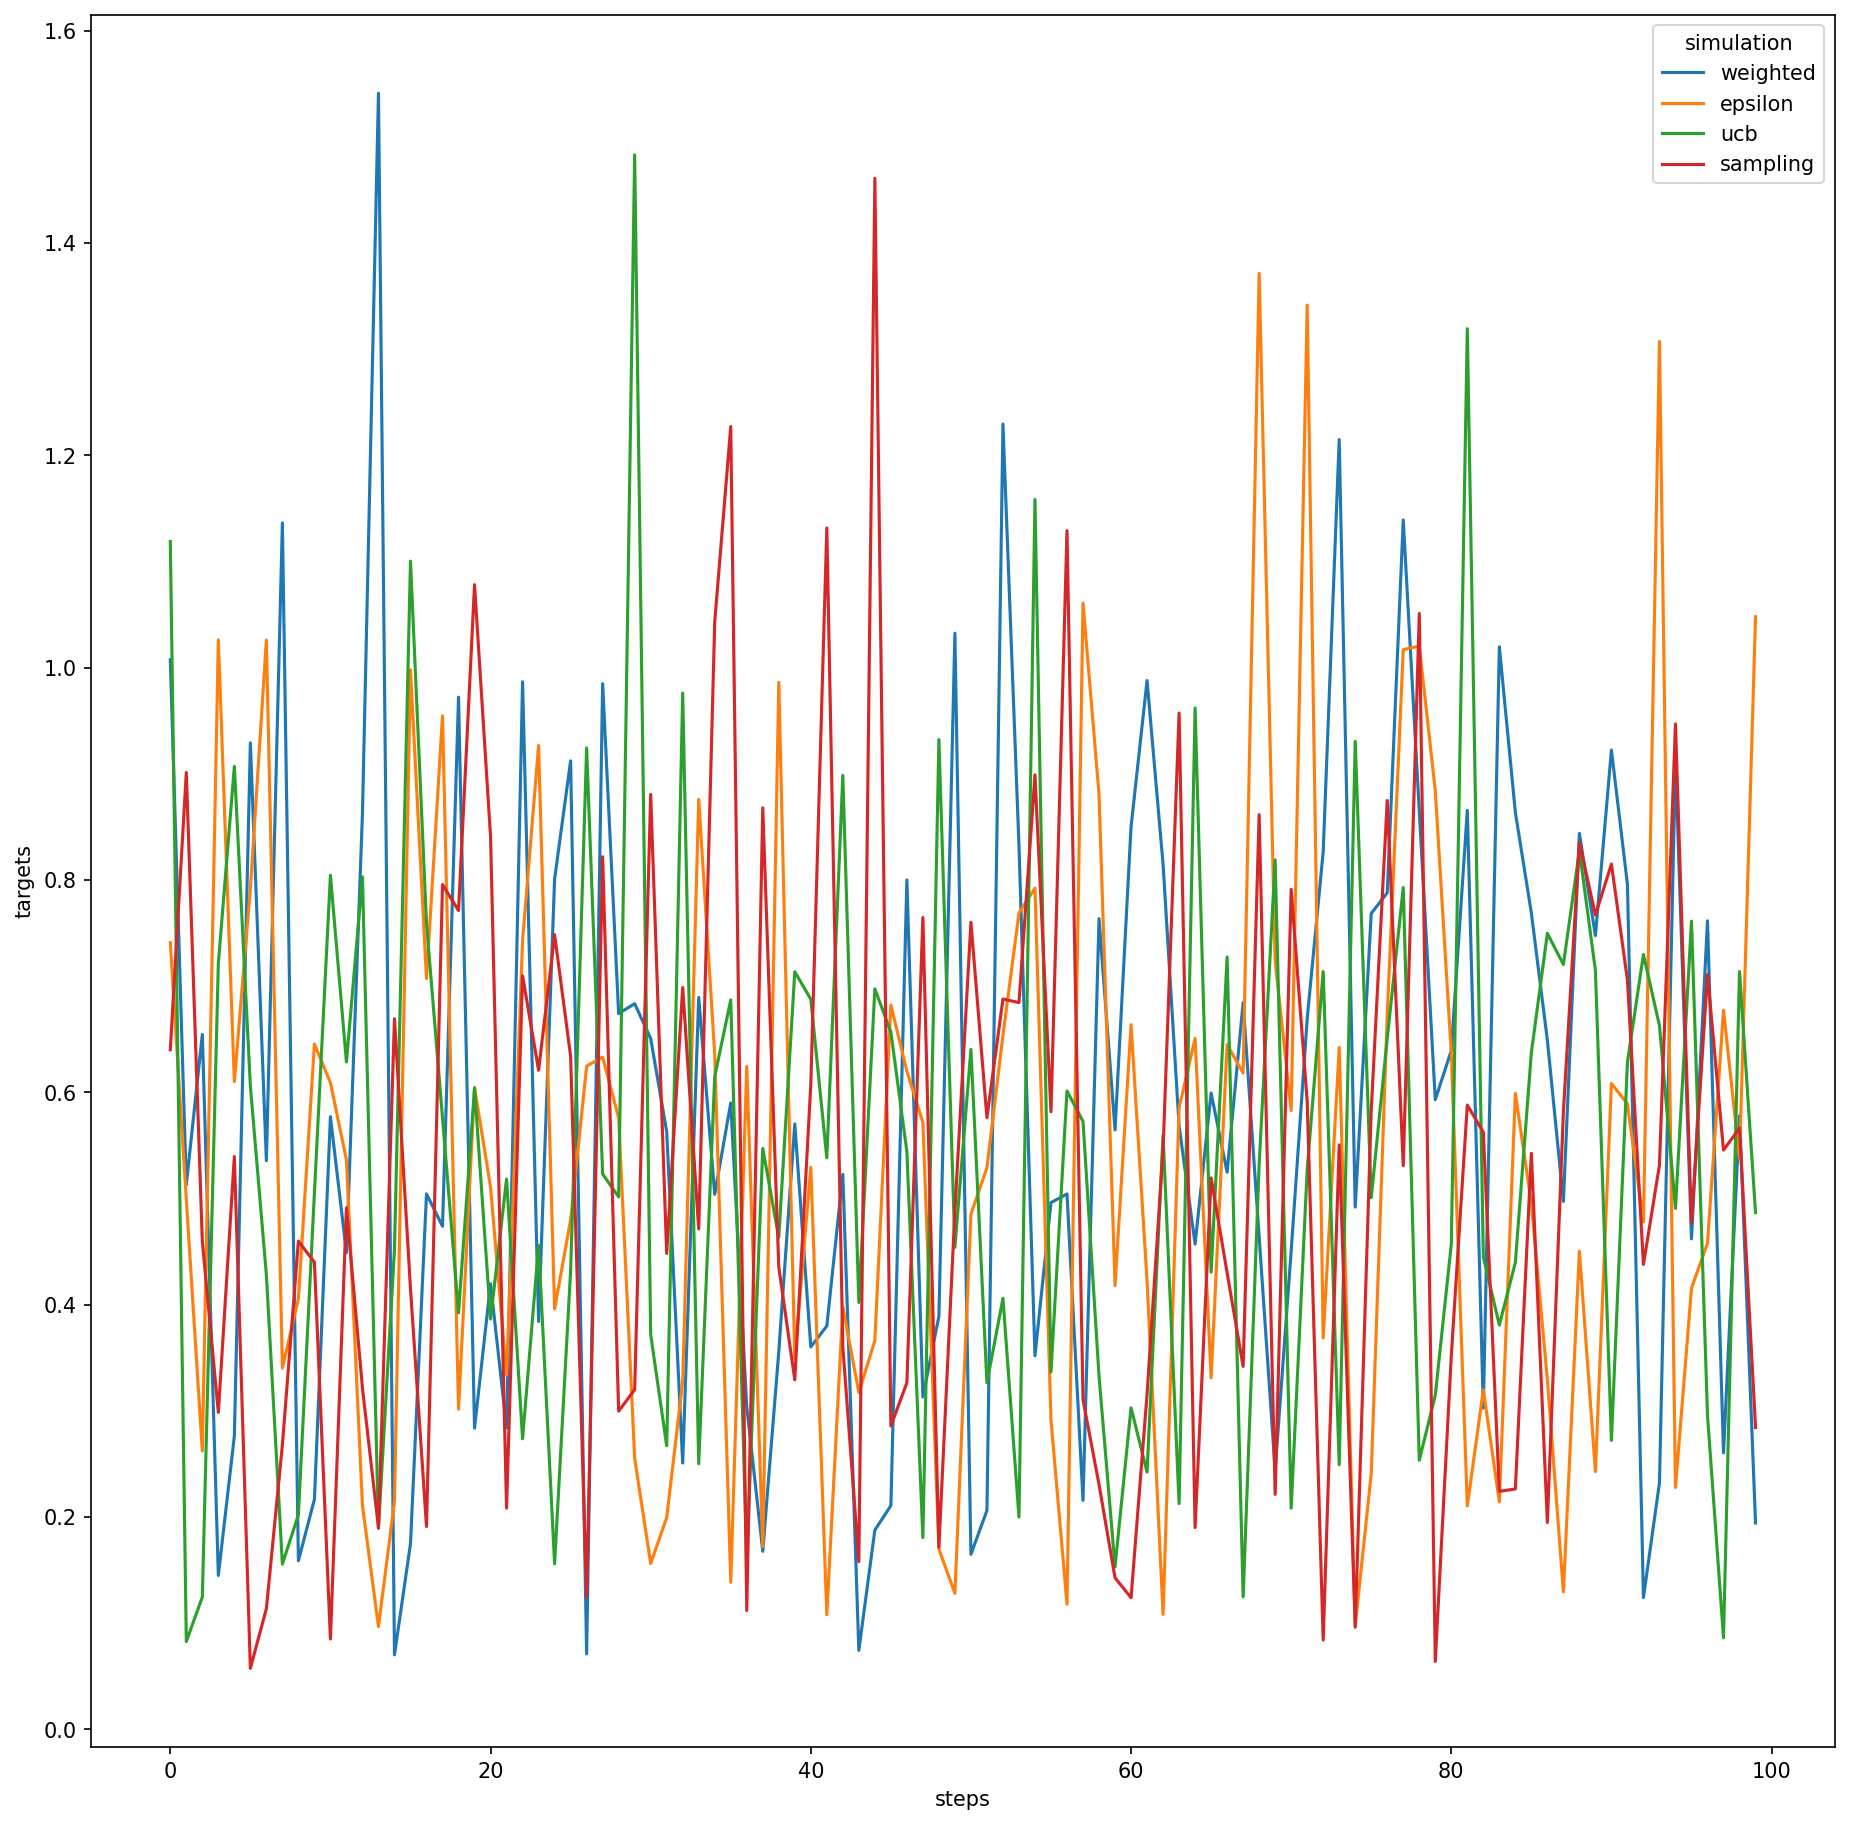

In [3]:
f = sns.lineplot(
    base_examples_df.loc[base_examples_df.steps < 100], 
    x='steps', 
    y='targets', 
    hue='simulation'
)

Since we know which distribution is best and these results are hard to interpret we will instead look at the number of times each solver called the right action

<Axes: xlabel='simulation', ylabel='count'>

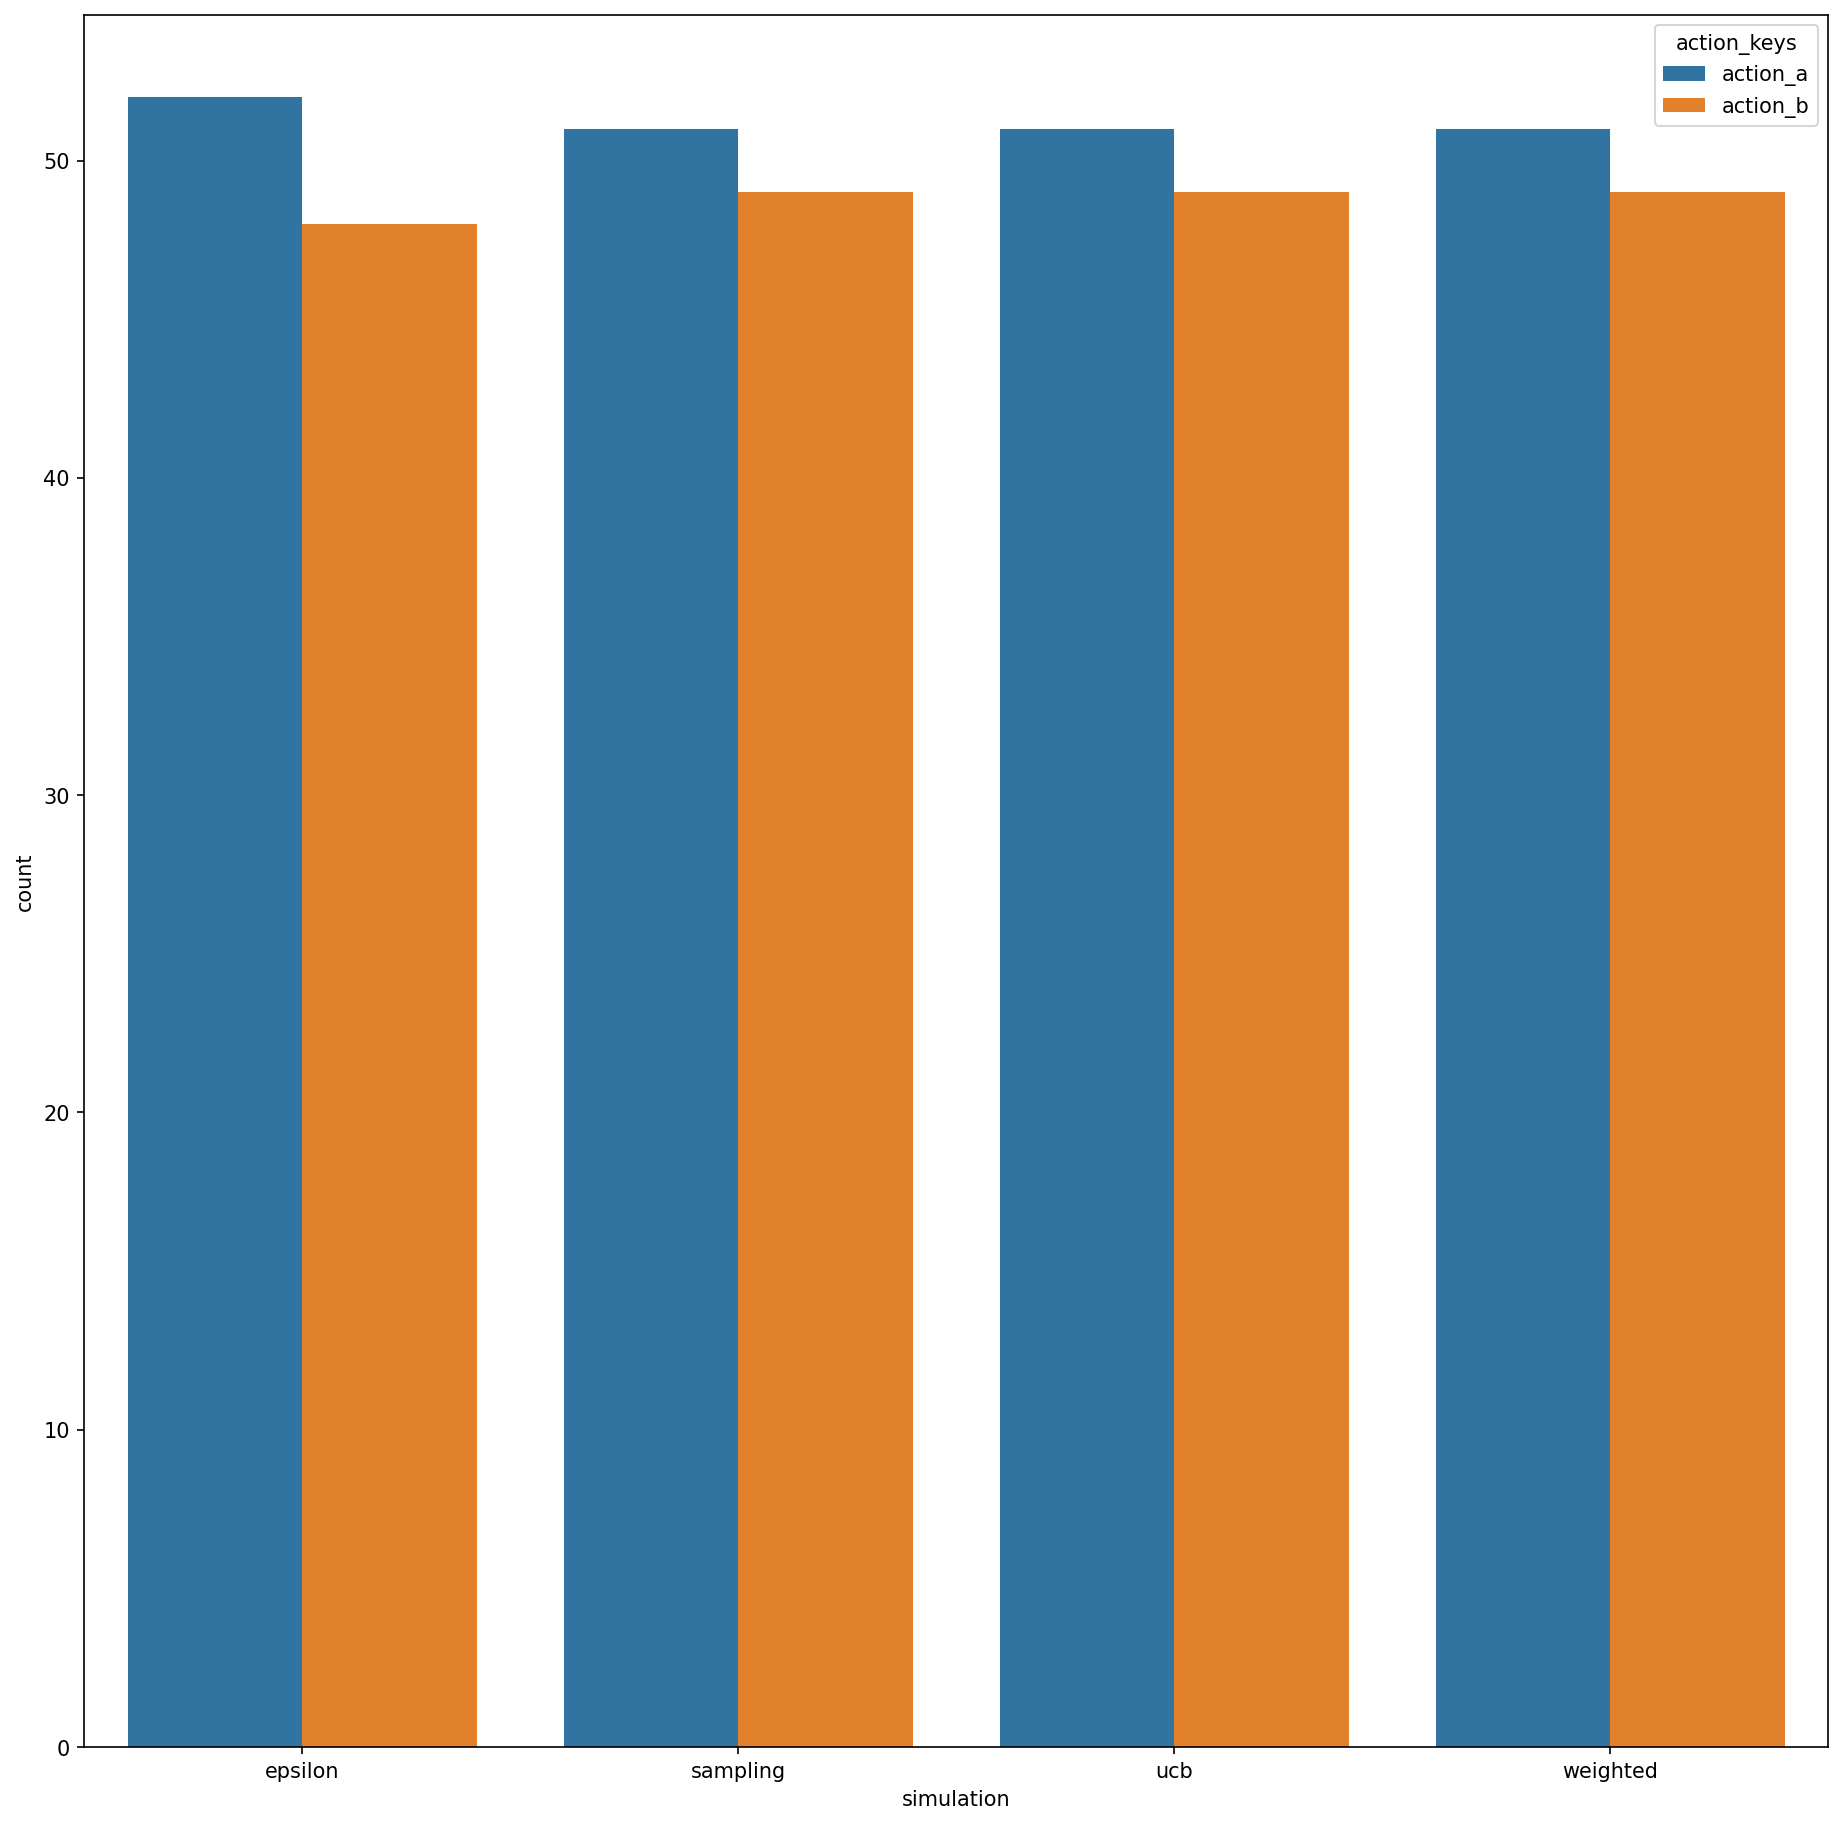

In [4]:
base_examples_action_count_df = (
    base_examples_df[['simulation', 'action_keys']]
    .groupby(['simulation', 'action_keys'])['action_keys']
    .count()
    .to_frame(name='count')
    .reset_index()
)

sns.barplot(
    base_examples_action_count_df,
    x='simulation',
    y='count',
    hue='action_keys'
)


We can see that in this context the better solver is the Sampling solver!

The next section will be about comparing performance of different solvers given different contexts
